In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Discovering the dataset
The first goal is to understand the data structure and rebuild the database in such a way as to keep only the elements that seem interesting to us.

In [2]:
dataFrame = pd.read_excel('tennis.xlsx')

In [3]:
print(dataFrame.head())

  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0   2000-717      Orlando    Clay         32             A      20000501   
1   2000-717      Orlando    Clay         32             A      20000501   
2   2000-717      Orlando    Clay         32             A      20000501   
3   2000-717      Orlando    Clay         32             A      20000501   
4   2000-717      Orlando    Clay         32             A      20000501   

   match_num  winner_id  winner_seed winner_entry    ...    w_bpFaced l_ace  \
0          1     102179          NaN          NaN    ...         15.0  13.0   
1          2     103602          NaN            Q    ...          6.0   0.0   
2          3     103387          NaN          NaN    ...          0.0   2.0   
3          4     101733          NaN          NaN    ...         12.0   4.0   
4          5     101727          4.0          NaN    ...          1.0   0.0   

   l_df l_svpt  l_1stIn  l_1stWon  l_2ndWon  l_SvGms  l_bpSaved l_bp

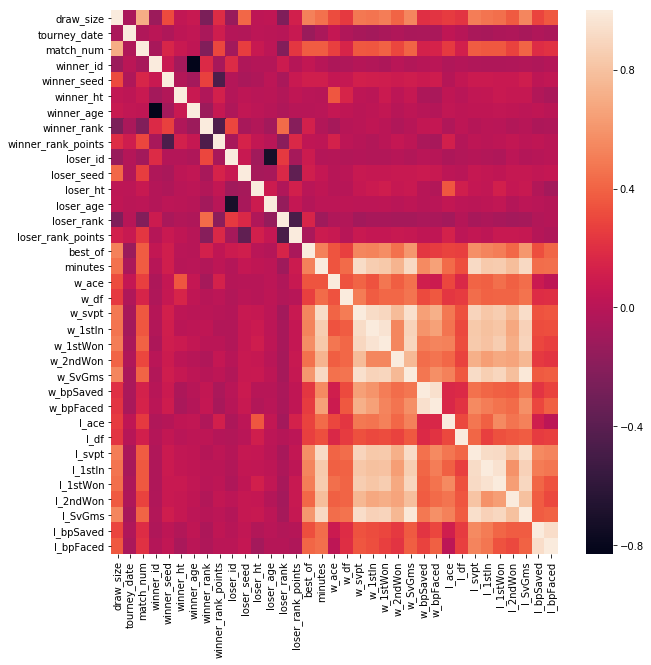

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(dataFrame.corr())

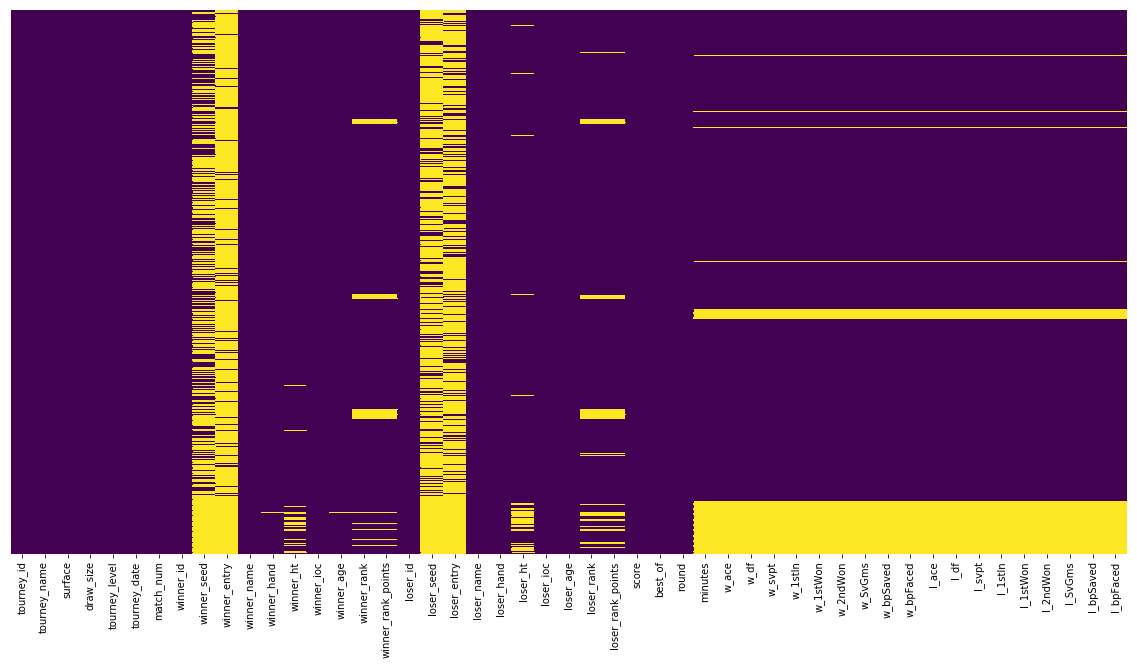

In [5]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataFrame.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
print(dataFrame.columns)

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'winner_rank', 'winner_rank_points', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'loser_rank', 'loser_rank_points', 'score', 'best_of',
       'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df',
       'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved',
       'l_bpFaced'],
      dtype='object')


<BarContainer object of 3364 artists>

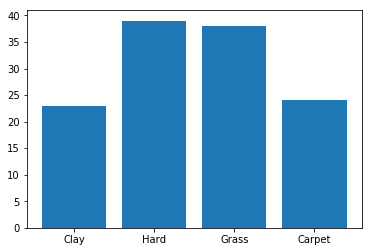

In [7]:
surface=dataFrame['surface']
points=dataFrame['w_ace']
plt.bar(surface, points, width = 0.8 )

<BarContainer object of 3364 artists>

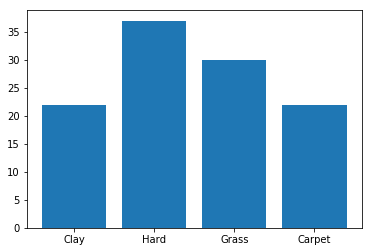

In [8]:
surface=dataFrame['surface']
points=dataFrame['l_ace']
plt.bar(surface, points, width = 0.8, )

# Data cleaning 
We first remove the data that we dont't require for learning.

In [9]:
dataFrame.drop(['tourney_id', 'tourney_name', 'draw_size', 'tourney_level', 'match_num', 'winner_entry', 'loser_entry'], axis=1, inplace=True)

# Finding and Filling missing values

In [10]:
dataFrame.isnull().sum()

surface                  0
tourney_date             0
winner_id                0
winner_seed           2138
winner_name              0
winner_hand              1
winner_ht              102
winner_ioc               0
winner_age               1
winner_rank            164
winner_rank_points     164
loser_id                 0
loser_seed            2691
loser_name               0
loser_hand               0
loser_ht               190
loser_ioc                0
loser_age                0
loser_rank             206
loser_rank_points      206
score                    0
best_of                  0
round                    0
minutes                422
w_ace                  423
w_df                   423
w_svpt                 423
w_1stIn                423
w_1stWon               423
w_2ndWon               423
w_SvGms                423
w_bpSaved              423
w_bpFaced              423
l_ace                  423
l_df                   423
l_svpt                 423
l_1stIn                423
l

In [11]:
def fill_missing_values(dataFrame):
    for column in dataFrame.columns:
        if dataFrame[column].dtype in ['int64', 'float64']:
            dataFrame[column].fillna(dataFrame[column].median(), inplace=True)
        elif dataFrame[column].dtype == 'bool':
            dataFrame[column].fillna(method='ffill', inplace=True)
        else:
            dataFrame[column].fillna('.', inplace=True)
            
fill_missing_values(dataFrame)

In [12]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 42 columns):
surface               3364 non-null object
tourney_date          3364 non-null int64
winner_id             3364 non-null int64
winner_seed           3364 non-null float64
winner_name           3364 non-null object
winner_hand           3364 non-null object
winner_ht             3364 non-null float64
winner_ioc            3364 non-null object
winner_age            3364 non-null float64
winner_rank           3364 non-null float64
winner_rank_points    3364 non-null float64
loser_id              3364 non-null int64
loser_seed            3364 non-null float64
loser_name            3364 non-null object
loser_hand            3364 non-null object
loser_ht              3364 non-null float64
loser_ioc             3364 non-null object
loser_age             3364 non-null float64
loser_rank            3364 non-null float64
loser_rank_points     3364 non-null float64
score                 3364


The date of the tournament can also be interesting, players can be in better condition on certain dates. We must transform it. For this we separate the year and the month.

In [13]:
from datetime import datetime as dt
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y%m%d').date()

dataFrame.tourney_date = dataFrame.tourney_date.astype(str)
dataFrame.tourney_date = dataFrame.tourney_date.apply(parse_date)

# Visualising distribution of data

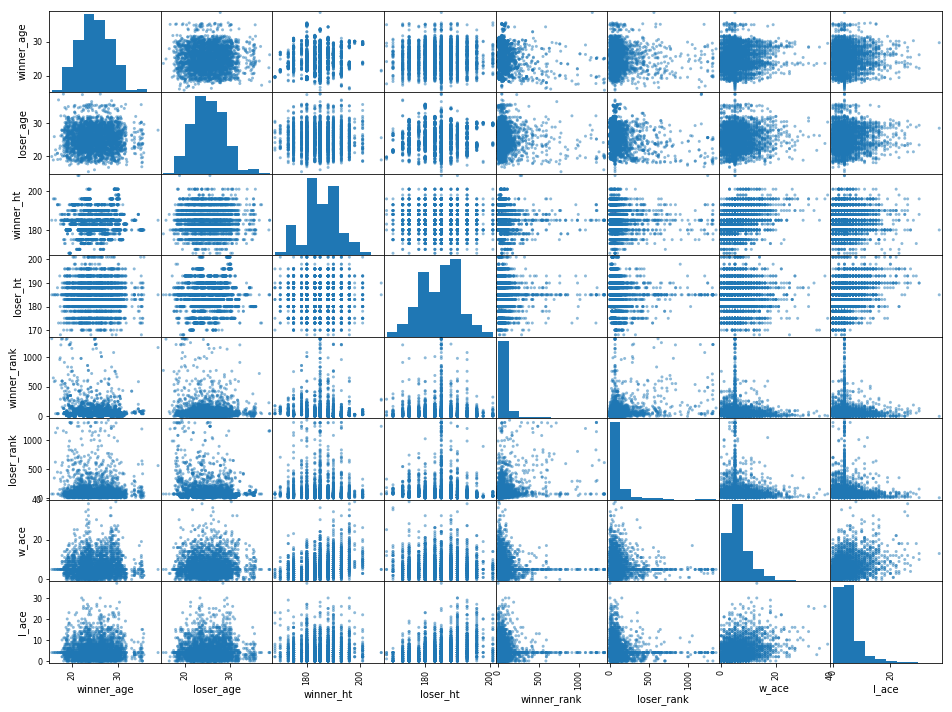

In [14]:
pd.plotting.scatter_matrix(dataFrame[['winner_age', 'loser_age', 'winner_ht', 'loser_ht', 'winner_rank', 'loser_rank', 'w_ace', 'l_ace']], figsize=(16,12));

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


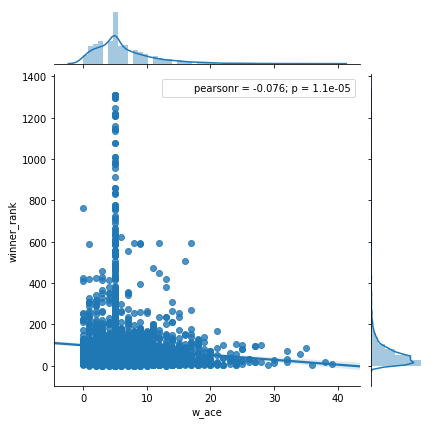

In [15]:
sns.jointplot(x='w_ace',y='winner_rank',data=dataFrame,kind='reg')


C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


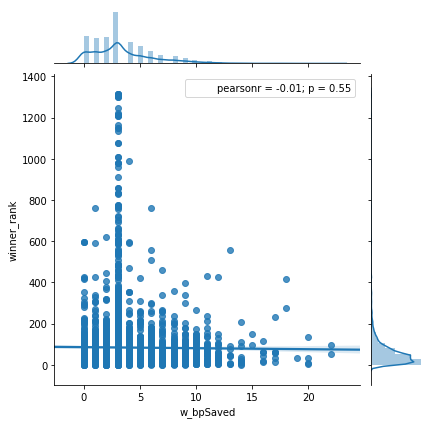

In [16]:
sns.jointplot(x='w_bpSaved',y='winner_rank',data=dataFrame,kind='reg')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


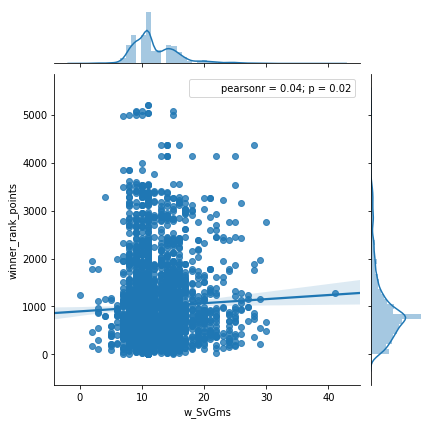

In [17]:
sns.jointplot(x='w_SvGms',y='winner_rank_points',data=dataFrame,kind='reg')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


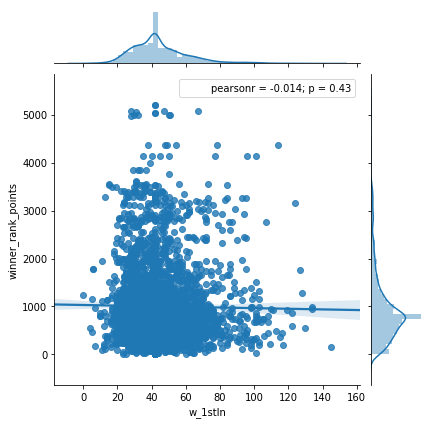

In [18]:
sns.jointplot(x='w_1stIn',y='winner_rank_points',data=dataFrame,kind='reg')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


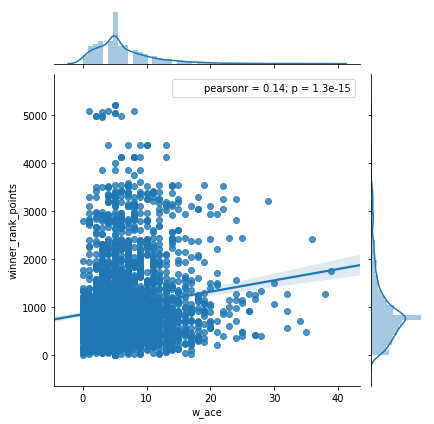

In [19]:
sns.jointplot(x='w_ace',y='winner_rank_points',data=dataFrame,kind='reg')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


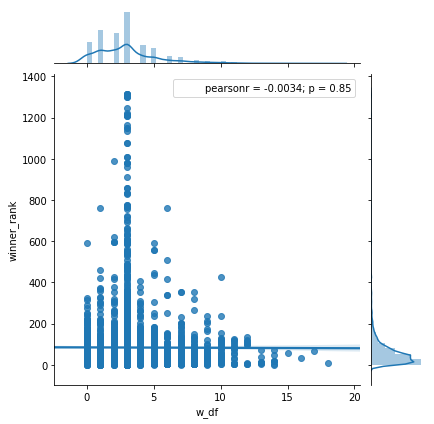

In [20]:
sns.jointplot(x='w_df',y='winner_rank',data=dataFrame,kind='reg')

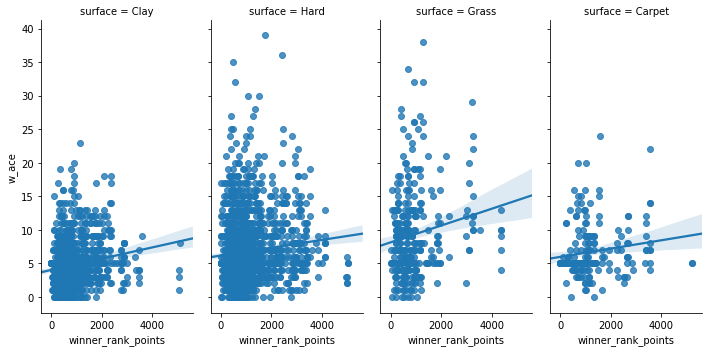

In [21]:
sns.lmplot(x="winner_rank_points", y="w_ace", col="surface", data=dataFrame,aspect=.5);

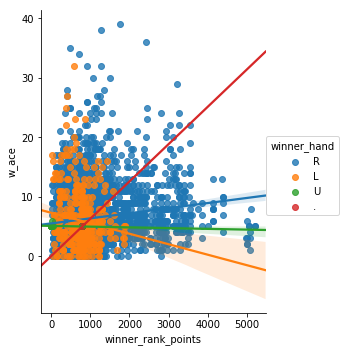

In [22]:
sns.pairplot(dataFrame, x_vars=["winner_rank_points"], y_vars=["w_ace"],hue="winner_hand", size=5, aspect=.8, kind="reg");


In [23]:
# Adding an extra column for result 
dataFrame['result'] = 1

In [24]:
#Renaming winner and loser player names
def change_column_names(dataFrame):
    column_names = list(dataFrame.columns)
    for i in range(len(column_names)):
        if column_names[i].startswith('w_') or column_names[i].startswith('winner_'):
            column_names[i] = 'Player1_' + "_".join(column_names[i].split('_')[1:])
        elif column_names[i].startswith('l_') or column_names[i].startswith('loser_'):
            column_names[i] = 'Player2_' + "_".join(column_names[i].split('_')[1:])
    dataFrame.columns = column_names
    
change_column_names(dataFrame)
print(dataFrame.columns)

Index(['surface', 'tourney_date', 'Player1_id', 'Player1_seed', 'Player1_name',
       'Player1_hand', 'Player1_ht', 'Player1_ioc', 'Player1_age',
       'Player1_rank', 'Player1_rank_points', 'Player2_id', 'Player2_seed',
       'Player2_name', 'Player2_hand', 'Player2_ht', 'Player2_ioc',
       'Player2_age', 'Player2_rank', 'Player2_rank_points', 'score',
       'best_of', 'round', 'minutes', 'Player1_ace', 'Player1_df',
       'Player1_svpt', 'Player1_1stIn', 'Player1_1stWon', 'Player1_2ndWon',
       'Player1_SvGms', 'Player1_bpSaved', 'Player1_bpFaced', 'Player2_ace',
       'Player2_df', 'Player2_svpt', 'Player2_1stIn', 'Player2_1stWon',
       'Player2_2ndWon', 'Player2_SvGms', 'Player2_bpSaved', 'Player2_bpFaced',
       'result'],
      dtype='object')


In [25]:
#Shuffling column names 
import random
def shuffle_column_names(dataFrame):
    for i in range(dataFrame.shape[0]):
        if random.random() >= 0.5:
            continue
        for column in dataFrame.columns:
            if not column.startswith('Player1_'):
                continue
            loser_column = 'Player2_' + "_".join(column.split('_')[1:])
            dataFrame.at[i, column], dataFrame.at[i, loser_column] = dataFrame.at[i, loser_column], dataFrame.at[i, column]
        dataFrame.at[i, 'result'] = 1 - dataFrame.at[i, 'result']

shuffle_column_names(dataFrame)

dataFrame.columns

Index(['surface', 'tourney_date', 'Player1_id', 'Player1_seed', 'Player1_name',
       'Player1_hand', 'Player1_ht', 'Player1_ioc', 'Player1_age',
       'Player1_rank', 'Player1_rank_points', 'Player2_id', 'Player2_seed',
       'Player2_name', 'Player2_hand', 'Player2_ht', 'Player2_ioc',
       'Player2_age', 'Player2_rank', 'Player2_rank_points', 'score',
       'best_of', 'round', 'minutes', 'Player1_ace', 'Player1_df',
       'Player1_svpt', 'Player1_1stIn', 'Player1_1stWon', 'Player1_2ndWon',
       'Player1_SvGms', 'Player1_bpSaved', 'Player1_bpFaced', 'Player2_ace',
       'Player2_df', 'Player2_svpt', 'Player2_1stIn', 'Player2_1stWon',
       'Player2_2ndWon', 'Player2_SvGms', 'Player2_bpSaved', 'Player2_bpFaced',
       'result'],
      dtype='object')

In [26]:
dataFrame.drop(['Player1_bpFaced','Player1_bpSaved','Player1_svpt','Player1_df','Player2_bpFaced','Player2_bpSaved','Player2_svpt','Player2_df'],axis=1,inplace=True)

In [27]:
from dateutil.relativedelta import relativedelta
from datetime import datetime as dt

def age_today(age_given_on, age_given):
    today_date = dt.today()
    difference_in_years = relativedelta(today_date, age_given_on).years
    return age_given + difference_in_years

def get_value_list(prefix, columns, pid_data):
    output = []
    for column in columns:
        output.append(pid_data["{}_{}".format(prefix,column)].values[0])
    output[6] = age_today(pid_data["tourney_date"].values[0], output[6])
    return output

def make_player_dataFrame(dataFrame):
    player = pd.DataFrame(columns = ['id', 'seed', 'name', 'hand', 'ht', 'ioc', 'age','rank', 'rank_points'])
    
    all_player_id = pd.concat([dataFrame['Player1_id'], dataFrame['Player2_id']])
    all_player_id = all_player_id.unique()
    
    for pid in all_player_id:
        pid_data = dataFrame[dataFrame.Player1_id == pid].iloc[-1:,]
        if pid_data.shape[0] == 1:
            player.loc[len(player)] = get_value_list('Player1', player.columns, pid_data)
            continue
        pid_data = dataFrame[dataFrame.Player2_id == pid].iloc[-1:,]
        if pid_data.shape[0] == 1:
            player.loc[len(player)] = get_value_list('Player2', player.columns, pid_data)

    return player

player_dataFrame = make_player_dataFrame(dataFrame)

In [28]:
X_all = dataFrame.drop(['result'],axis=1)
y_all = dataFrame['result']


def preprocess_features(X):
    ''' Converts catagorical variables into dummy variables'''
    output = pd.DataFrame(index = X.index)

    for col, col_data in X.iteritems():
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
        output = output.join(col_data)
    return output

X_all = preprocess_features(X_all)

In [29]:
X_all.head()

,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_date_2000-01-03,tourney_date_2000-01-10,tourney_date_2000-01-17,tourney_date_2000-01-28,tourney_date_2000-02-04,tourney_date_2000-02-07,...,Player1_ace,Player1_1stIn,Player1_1stWon,Player1_2ndWon,Player1_SvGms,Player2_ace,Player2_1stIn,Player2_1stWon,Player2_2ndWon,Player2_SvGms
0,0,1,0,0,0,0,0,0,0,0,...,13.0,59.0,49.0,31.0,17.0,8.0,76.0,56.0,29.0,16.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,24.0,13.0,17.0,10.0,4.0,35.0,25.0,16.0,10.0
2,0,1,0,0,0,0,0,0,0,0,...,4.0,29.0,23.0,11.0,8.0,2.0,39.0,22.0,10.0,8.0
3,0,1,0,0,0,0,0,0,0,0,...,4.0,57.0,35.0,24.0,15.0,8.0,56.0,43.0,21.0,15.0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,28.0,17.0,10.0,8.0,3.0,27.0,22.0,16.0,9.0


In [30]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Columns: 2383 entries, surface_Carpet to Player2_SvGms
dtypes: float64(21), int64(3), uint8(2359)
memory usage: 8.2 MB



We separate the test and train data :

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2)

# Model Implementation

Training a LogisticRegression using a training set size of 2354. . .
Trained model in 0.8198 seconds
Made predictions in 0.0768 seconds.
0.9510429970200086 0.9511469838572643
F1 score and accuracy score for training set: 0.9510 , 0.9511.
Made predictions in 0.0259 seconds.
F1 score and accuracy score for test set: 0.9035 , 0.9030.

Training a MultinomialNB using a training set size of 2354. . .
Trained model in 0.1376 seconds
Made predictions in 0.0888 seconds.
0.6552444630171332 0.6495327102803738
F1 score and accuracy score for training set: 0.6552 , 0.6495.
Made predictions in 0.0419 seconds.
F1 score and accuracy score for test set: 0.6609 , 0.6505.

Training a DecisionTreeClassifier using a training set size of 2354. . .
Trained model in 0.5027 seconds
Made predictions in 0.0908 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0359 seconds.
F1 score and accuracy score for test set: 0.9599 , 0.9594.

Training a SVC using a traini

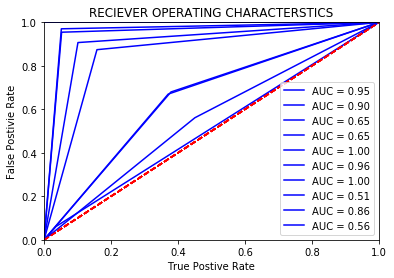

In [32]:
from time import time 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


def make_roc_curve(y_test, y_pred):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.title("RECIEVER OPERATING CHARACTERSTICS")
    plt.plot(fpr, tpr, 'b', label='AUC = {0:.2f}'.format(roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel("True Postive Rate")
    plt.ylabel("False Postivie Rate")

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    make_roc_curve(target, y_pred)
    return f1_score(target, y_pred, pos_label=1), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

    
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = MultinomialNB()
clf_C = DecisionTreeClassifier()
clf_D = SVC()
clf_E = GaussianNB()

train_predict(clf_A, X_train, y_train, X_test, y_test)
print()
train_predict(clf_B, X_train, y_train, X_test, y_test)
print()
train_predict(clf_C, X_train, y_train, X_test, y_test)
print()
train_predict(clf_D, X_train, y_train, X_test, y_test)
print()
train_predict(clf_E, X_train, y_train, X_test, y_test)
print()

In [33]:
# validating age_today_function to see if age is updated to today
player_dataFrame[player_dataFrame.name == 'Roger Federer']

,id,seed,name,hand,ht,ioc,age,rank,rank_points
79,103819,6.0,Roger Federer,R,185.0,SUI,36.480493,61.0,652.0


In [34]:
dataFrame.columns

Index(['surface', 'tourney_date', 'Player1_id', 'Player1_seed', 'Player1_name',
       'Player1_hand', 'Player1_ht', 'Player1_ioc', 'Player1_age',
       'Player1_rank', 'Player1_rank_points', 'Player2_id', 'Player2_seed',
       'Player2_name', 'Player2_hand', 'Player2_ht', 'Player2_ioc',
       'Player2_age', 'Player2_rank', 'Player2_rank_points', 'score',
       'best_of', 'round', 'minutes', 'Player1_ace', 'Player1_1stIn',
       'Player1_1stWon', 'Player1_2ndWon', 'Player1_SvGms', 'Player2_ace',
       'Player2_1stIn', 'Player2_1stWon', 'Player2_2ndWon', 'Player2_SvGms',
       'result'],
      dtype='object')

# Predicting the winner

In [35]:
def predict_winner(Player1_name, Player2_name):
    try:
        Player1_data = player_dataFrame[player_dataFrame.name == Player1_name].iloc[0]
        Player2_data = player_dataFrame[player_dataFrame.name == Player2_name].iloc[0]
    except:
        return "Player name cannot be found"
    
    predict_input = pd.DataFrame(columns=X_all.columns)
    data_dict = {}
    
    for column in player_dataFrame.columns:
        if dataFrame['Player1_'+column].dtype == object:
            data_dict['Player1_'+column+'_'+Player1_data[column]] = 1
            data_dict['Player2_'+column+'_'+Player1_data[column]] = 1
        else:
            data_dict['Player1_'+column] = Player1_data[column]
            data_dict['Player2_'+column] = Player2_data[column]
            
    predict_input = predict_input.append(data_dict, ignore_index=True)
    predict_input.fillna(inplace=True, value=0)
    return [Player1_name, Player2_name][clf_A.predict(predict_input)[0]]

predict_winner("Nicolas Massu", "Antony Dupuis")

'Antony Dupuis'